# Loan Payment status -  Classification Model

In [1]:
# importing all the necessary packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

In [2]:
path = 'C:/AI/ML/Datasets/'

In [3]:
loan_data = pd.read_csv(path+'Loan Payments data.csv',header=0)

In [4]:
loan_data.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [5]:
loan_data.isna().sum()

Loan_ID             0
loan_status         0
Principal           0
terms               0
effective_date      0
due_date            0
paid_off_time     100
past_due_days     300
age                 0
education           0
Gender              0
dtype: int64

** paid_off_time and past_due_days columns have nan values. We will replace the missing values with "0" **

In [6]:
loan_data.fillna(0,inplace=True)

In [7]:
#checking the correlation between the feature columns
corr = loan_data.corr()

In [8]:
corr

,Principal,terms,past_due_days,age
Principal,1.000000,0.534302,0.027682,-0.092613
terms,0.534302,1.000000,0.031007,-0.074259
past_due_days,0.027682,0.031007,1.000000,-0.038014
age,-0.092613,-0.074259,-0.038014,1.000000


# 1. Exploratory data analysis

** we will do EDA to find the relationship between the feature columns and the output column.** 

** loan_status ** is the output column. Three categories are PAIDOFF, COLLECTION AND COLLECTION PAIDOFF


In [9]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
Loan_ID           500 non-null object
loan_status       500 non-null object
Principal         500 non-null int64
terms             500 non-null int64
effective_date    500 non-null object
due_date          500 non-null object
paid_off_time     500 non-null object
past_due_days     500 non-null float64
age               500 non-null int64
education         500 non-null object
Gender            500 non-null object
dtypes: float64(1), int64(3), object(7)
memory usage: 43.0+ KB


In [10]:
#checking count of each categories in the output column
loan_data['loan_status'].value_counts()

PAIDOFF               300
COLLECTION_PAIDOFF    100
COLLECTION            100
Name: loan_status, dtype: int64

** The output column is not balanced. It has 3 times more data points for the category 'PAIDOFF' than 'Collection' and 'Collection_Paidoff' **

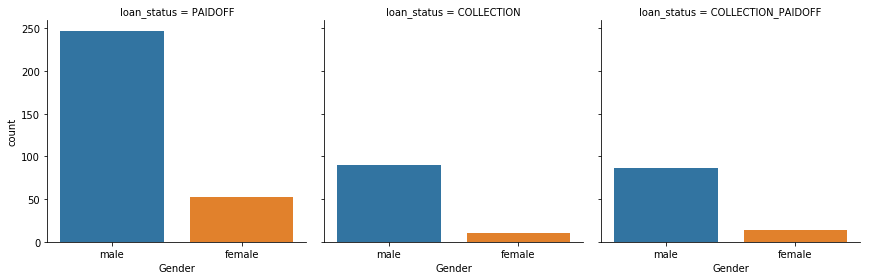

In [11]:
sns.factorplot(x='Gender',col='loan_status',kind='count',data=loan_data)

In [12]:
loan_data['Gender'].value_counts()

male      423
female     77
Name: Gender, dtype: int64

From the factorplot ,it looks like Gender does not have significant impact on the loan_status.

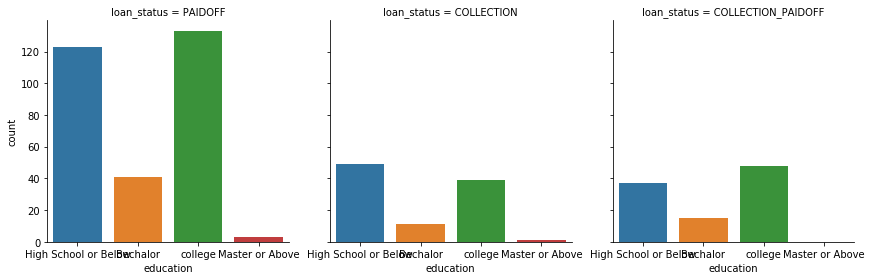

In [13]:
#plot education and loan_status
sns.factorplot(x='education',col='loan_status',kind='count',data=loan_data)

In [14]:
loan_data['education'][loan_data['loan_status']=='PAIDOFF'].value_counts()

college                 133
High School or Below    123
Bechalor                 41
Master or Above           3
Name: education, dtype: int64

**education 'college' has more loan in paidoff than 'high school or below'. education 'High school or below' has more loan in collection than 'college' , 'college' has more loans in collection_paidoff.However,we cant clearly categorize the loan status based on education. The significance of education on loan_status is less.**

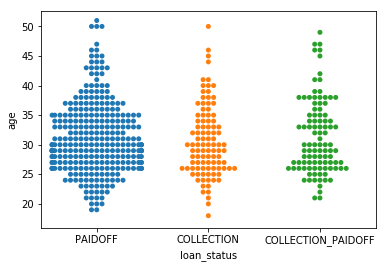

In [15]:
sns.swarmplot(y='age',x='loan_status',data=loan_data)

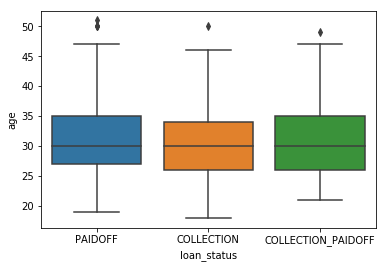

In [16]:
sns.boxplot(y='age',x='loan_status',data=loan_data)

there is no relation between age & loan_status

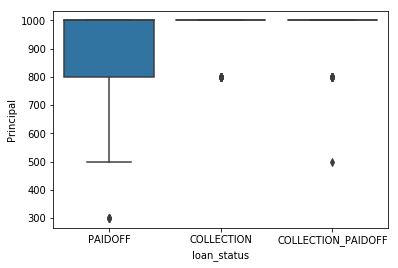

In [17]:
#plotting principal & loan_status
sns.boxplot(x='loan_status',y='Principal',data=loan_data)

In [18]:
loan_data['Principal'].value_counts()

1000    377
800     111
300       6
500       3
900       2
700       1
Name: Principal, dtype: int64

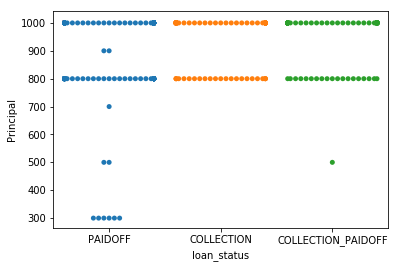

In [19]:
sns.swarmplot(x='loan_status',y='Principal',data=loan_data)

when the principal amount is less than 800,the loan is mostly getting paid off. Only on one data point the loan is 'collection paidoff' when the principal is less than 800. When the principal is more than 800, we can't clearly categorize the loan_status.
It looks like , there is a relaionship between loan_status & principal eventhough not significant.

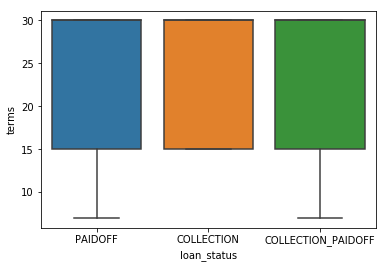

In [20]:
sns.boxplot(x='loan_status',y='terms',data=loan_data)

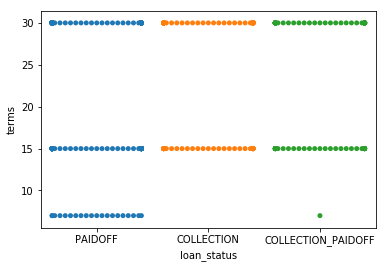

In [21]:
sns.swarmplot(x='loan_status',y='terms',data=loan_data)

when the loan terms is weekly loan is mostly getting paid off.
There is no loan with weekly term in collection status. One loan is in collection paidoff status for weekly terms.
The loan is very likely go into collection when the loan terms is weekly.

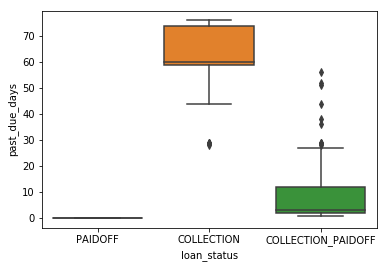

In [22]:
sns.boxplot(x='loan_status',y='past_due_days',data=loan_data)

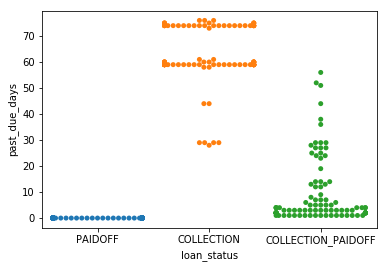

In [23]:
sns.swarmplot(x='loan_status',y='past_due_days',data=loan_data)

when the past due days is more than 30 the loan is likely to go into collection. The customer is most likely to default when the past due days is more than 30.

** Observation from EDA:**

Past_due_days looks like the most important feature of the dataset to classify the loan_status.
Principal,terms and education columns look like less important for classification of loan_status.

In [24]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
Loan_ID           500 non-null object
loan_status       500 non-null object
Principal         500 non-null int64
terms             500 non-null int64
effective_date    500 non-null object
due_date          500 non-null object
paid_off_time     500 non-null object
past_due_days     500 non-null float64
age               500 non-null int64
education         500 non-null object
Gender            500 non-null object
dtypes: float64(1), int64(3), object(7)
memory usage: 43.0+ KB


# 2.Feature engineering

split the data into numeric and non numeric columns.There are 4 numerical columns & two categorical columns

In [25]:
cat_df = loan_data[['education','Gender']]

In [26]:
cat_df.shape

(500, 2)

In [27]:
# convert categorical vlaues in to dummy values
cat_cols = pd.get_dummies(cat_df,drop_first=True)
cat_cols.head()

,education_High School or Below,education_Master or Above,education_college,Gender_male
0,1,0,0,1
1,0,0,0,0
2,0,0,0,0
3,0,0,1,1
4,0,0,1,0


In [28]:
# select numerical columns
num_df = loan_data.drop(['Loan_ID','effective_date','due_date','paid_off_time','education','Gender'],axis=1)

In [29]:
num_df.shape

(500, 5)

In [30]:
loan_data.shape

(500, 11)

In [31]:
#concatente the dummied categorical columns & numerical columns 
dataset = pd.concat([cat_cols,num_df],axis=1)

In [32]:
dataset.head()

,education_High School or Below,education_Master or Above,education_college,Gender_male,loan_status,Principal,terms,past_due_days,age
0,1,0,0,1,PAIDOFF,1000,30,0.0,45
1,0,0,0,0,PAIDOFF,1000,30,0.0,50
2,0,0,0,0,PAIDOFF,1000,30,0.0,33
3,0,0,1,1,PAIDOFF,1000,15,0.0,27
4,0,0,1,0,PAIDOFF,1000,30,0.0,28


In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
education_High School or Below    500 non-null uint8
education_Master or Above         500 non-null uint8
education_college                 500 non-null uint8
Gender_male                       500 non-null uint8
loan_status                       500 non-null object
Principal                         500 non-null int64
terms                             500 non-null int64
past_due_days                     500 non-null float64
age                               500 non-null int64
dtypes: float64(1), int64(3), object(1), uint8(4)
memory usage: 21.6+ KB


Now the dataset is converted to all numerical columns. Loan_status column is the output column.


Our aim is to create a model to classify the customers in to any of the given three categories. 

**Since this is a classification problem we will create a model using Deccision Tree, Random Forest, KNN and SVM.**


# 3. Model using  Decision Tree Algorithm

In [34]:
# output column
y = dataset['loan_status'].values

In [35]:
#feature columns

X = dataset.drop(['loan_status'],axis=1)


## 3.1. Split Train Test data

In [36]:
#checking the distribution of categories in the output column
dataset['loan_status'].value_counts()

PAIDOFF               300
COLLECTION_PAIDOFF    100
COLLECTION            100
Name: loan_status, dtype: int64

The PAIDOFF category has 3 times more data points in the output than the Collection_Paidoff and collecion. Since the classes are not evenly distributed, we will use the stratified sampling of Train test split to make sure that same % of samples of each categories are used in the train & test data.

In [37]:
#stratified sampling 
# 1/3 of the data will be test data

from sklearn.model_selection import train_test_split
X_Train,X_Test,Y_Train,Y_Test = train_test_split(X,y, test_size=0.3,random_state=101,stratify=y)


In [38]:
print(np.unique(Y_Train,return_counts=True))

(array(['COLLECTION', 'COLLECTION_PAIDOFF', 'PAIDOFF'], dtype=object), array([ 70,  70, 210], dtype=int64))


In [39]:
print(np.unique(Y_Test,return_counts=True))

(array(['COLLECTION', 'COLLECTION_PAIDOFF', 'PAIDOFF'], dtype=object), array([30, 30, 90], dtype=int64))


** Approximately 2/3 of each output category is in Train data set and 1/3 of each output category is in Test dataset.**

In [40]:
#importing the packages for Decision Tree classifier
from sklearn import tree

In [41]:
# We will create a decision tree model with depth = 4 , min_samples_split = 2,min_samples_leaf = 2,class weight = balanced
# since the classes are unbalanced, we will use the class_weights = balanced
my_tree_one = tree.DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state = 101,min_samples_split=2,min_samples_leaf=2,class_weight="balanced")

In [42]:
my_tree_one

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=4, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=101,
            splitter='best')

## 3.2 Training the Decision Tree Model

In [43]:
#fit training data
my_tree_one = my_tree_one.fit(X_Train,Y_Train)

In [44]:
#list the importance of each feature column
list(zip(X_Train.columns,my_tree_one.feature_importances_))

[('education_High School or Below', 0.0),
 ('education_Master or Above', 0.0),
 ('education_college', 0.0),
 ('Gender_male', 0.0),
 ('Principal', 0.0),
 ('terms', 0.0),
 ('past_due_days', 1.0),
 ('age', 0.0)]

** past_due_days has feature importance of 1.0 and all other columns are 0. This is similar to the EDA analysis where we found past_due_days column to be most important feature **

In [45]:
#Acccuracy of the model on Train data

print(my_tree_one.score(X_Train,Y_Train))

0.9885714285714285


## 3.3. Test the Decision Tree model

### 3.3.1 Prediction of Decision Tree model

In [46]:
y_pred_dt1 = my_tree_one.predict(X_Test)

### 3.3.2 Evaluation of Decision Tree

In [47]:
#accuracy of test data
accuracy_dt1 = my_tree_one.score(X_Test,Y_Test)
print(accuracy_dt1)

0.9733333333333334


In [48]:
#Print Confusion matrix on Train Data
from sklearn.metrics import confusion_matrix, classification_report

df_confusion = confusion_matrix(Y_Test,y_pred_dt1)
df_confusion

array([[30,  0,  0],
       [ 4, 26,  0],
       [ 0,  0, 90]], dtype=int64)

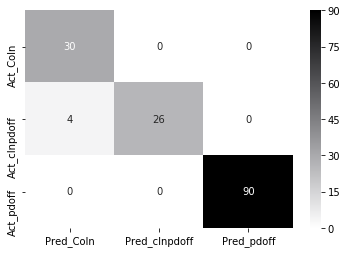

In [50]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=1, dark=0, as_cmap=True)
sns.heatmap(df_confusion,cmap = cmap,xticklabels=['Pred_Coln','Pred_clnpdoff','Pred_pdoff'],yticklabels=['Act_Coln','Act_clnpdoff','Act_pdoff'], annot=True,
            fmt='d')

In [50]:
# print the precision & recall score for the model
print(classification_report(Y_Test,y_pred_dt1))

                    precision    recall  f1-score   support

        COLLECTION       0.88      1.00      0.94        30
COLLECTION_PAIDOFF       1.00      0.87      0.93        30
           PAIDOFF       1.00      1.00      1.00        90

       avg / total       0.98      0.97      0.97       150



### 3.3.3. Observation - Decision Tree Model #1

** OBSERVATION **
Though the accuracy of the decision tree model on test data is .97 , the precision score is 0.88 for category 'COLLECTION'.
This means that when the loan status is predicted as 'COLLECTION' it is correct 88%.

Our aim is to identify the customers who are likely to default i.e. to predict the customers who will be in category 'collection'.
When the actual status is 'collection', the model predicts correctly 100% of the time.(recall value 1)
The model wrongly classify the 'collection_paidoff' as 'collection' for 4 data points.


### 3.3.4 Graphical representation of decision tree model

In [51]:
with open('tree.dot','w') as dotfile:
    tree.export_graphviz(my_tree_one)
   #tree.export_graphviz(my_tree_one, out_file=dotfile, feature_names=X_Train.columns, filled=True)
    dotfile.close()


C:\Users\ilango\Anaconda3\lib\site-packages\sklearn\tree\export.py:399: DeprecationWarning: out_file can be set to None starting from 0.18. This will be the default in 0.20.
  DeprecationWarning)


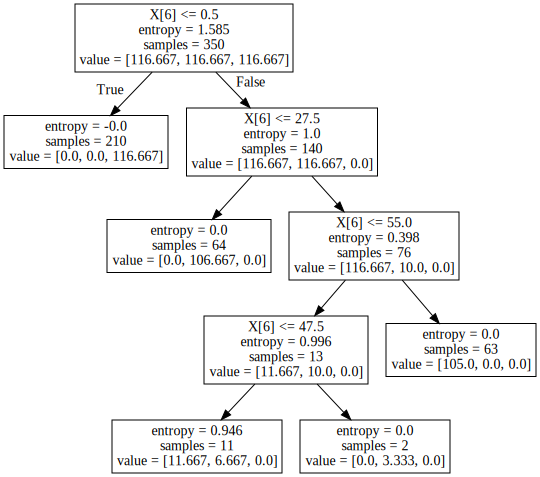

In [52]:
from graphviz import Source

with open('tree.dot','r') as f:
    text=f.read()
    plot=Source(text)
plot

## 3.4. Hyper Parameter Tuning


### 3.4.1. Grid Search

** we will apply the Grid Search on the Decision Tree model to come up with the best model. **

In [53]:
#different hyper parameters we want to test
max_depth = [1,2,3,4,5] 
criterion = ['gini', 'entropy']
min_samples_split= [2,3,4,5,6]
min_samples_leaf= [1,2,3,4]

In [54]:
# Importing GridSearch

from sklearn.model_selection import GridSearchCV

In [55]:
# Building the model

my_tree_two = tree.DecisionTreeClassifier(class_weight="balanced")

# Cross-validation tells how well a model performs on a dataset using multiple samples of train data
grid = GridSearchCV(estimator = my_tree_two, cv=10, 
                    param_grid = dict(max_depth = max_depth, criterion = criterion,min_samples_split= min_samples_split,
                                     min_samples_leaf=min_samples_leaf))

In [56]:
#fit the training data
grid.fit(X_Train,Y_Train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5], 'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 3, 4, 5, 6], 'min_samples_leaf': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [57]:
#best score from the grid search
grid.best_score_


0.98

In [58]:
#list the best parameters from the grid search
grid.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

## 3.4.2. Decision Tree Model using best params from Grid Search

In [59]:
# create the model using the best params from Grid Search
my_tree_three = tree.DecisionTreeClassifier(criterion= 'gini', max_depth= 3,min_samples_split=2,min_samples_leaf=1, random_state=101, class_weight="balanced")

In [60]:
#fit the training data
my_tree_three.fit(X_Train,Y_Train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=101,
            splitter='best')

In [61]:
list(zip(X_Train.columns,my_tree_three.feature_importances_))

[('education_High School or Below', 0.0),
 ('education_Master or Above', 0.0),
 ('education_college', 0.0),
 ('Gender_male', 0.0),
 ('Principal', 0.0),
 ('terms', 0.0),
 ('past_due_days', 1.0),
 ('age', 0.0)]

In [62]:
accuracy_dt3=my_tree_three.score(X_Test,Y_Test)

In [63]:
y_pred_dt3 = my_tree_three.predict(X_Test)

In [64]:
dt3_confusion = confusion_matrix(Y_Test,y_pred_dt3)
dt3_confusion

array([[30,  0,  0],
       [ 4, 26,  0],
       [ 0,  0, 90]], dtype=int64)

## 3.5. Conclusion from Decision Tree Model

In [65]:
print("accuracy of decision tree model 1:",accuracy_dt1)
print("accuracy of decision tree model 2 after hyper parameter tuning:",accuracy_dt3)

accuracy of decision tree model 1: 0.9733333333333334
accuracy of decision tree model 2 after hyper parameter tuning: 0.9733333333333334


**The best accuracy of the Decision Tree model is 0.973. The accuracy did not improve even after hyper parameter tuning.**


 ** We will see if we can improve the accuracy by developing a model using Random Forest Algorithm**

# 4. Model using Random Forest Algorithm

In [170]:
#import the packages for Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

In [171]:
#we will create the initial model by assuming the no.of estimators as 300, min_sample_slit = 2, min_samples_leaf=2

In [172]:
forest = RandomForestClassifier(criterion= 'entropy',n_estimators=300,min_samples_split=2,min_samples_leaf=2,class_weight="balanced",random_state= 101,)

## 4.1. Training Random Forest Model

In [173]:
#fit training data
myforest = forest.fit(X_Train,Y_Train)

In [174]:
# Accuracy of the model on Train Data
print(myforest.score(X_Train,Y_Train))

0.9942857142857143


** The training accuracy of Random Forest model has improved to 0.994 comared to the Decision Tree training accuracy of 0.98**

## 4.2. Prediction from random Forest Model

In [175]:
#predict the output using the model
y_pred_rf1 = myforest.predict(X_Test)


In [176]:
list(zip(X_Train.columns,forest.feature_importances_))

[('education_High School or Below', 0.00951028984880943),
 ('education_Master or Above', 0.0007727193944715939),
 ('education_college', 0.00929181924937539),
 ('Gender_male', 0.013217689771608346),
 ('Principal', 0.012682204873485271),
 ('terms', 0.021078038853215433),
 ('past_due_days', 0.8496599847323677),
 ('age', 0.08378725327666696)]

In the Decision Tree Model only Past_Due_Days had importance of 1 and all other features were 0. In the Random Forest Model we can see that importance for other features is slightly increased. 

Age and terms are the next important features respectively after past_due_days in classifying the loan_status

### 4.2.1. Evaluation of Random Forest Model

In [177]:
accuracy_rf = myforest.score(X_Test,Y_Test)
print(accuracy_rf)

0.98


In [178]:
df_confusion_rf = confusion_matrix(Y_Test,y_pred_rf1)
df_confusion_rf

array([[30,  0,  0],
       [ 3, 27,  0],
       [ 0,  0, 90]], dtype=int64)

In [49]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=1, dark=0, as_cmap=True)
sns.heatmap(df_confusion_rf,cmap = cmap,xticklabels=['Pred_Coln','Pred_clnpdoff','Pred_pdoff'],yticklabels=['Act_Coln','Act_clnpdoff','Pred_pdoff'], annot=True,
            fmt='d')

NameError: name 'df_confusion_rf' is not defined

## 4.3. Observation of Random Forest Model

In [180]:
print('Accuracy of Decision Tree Model on Test data:',accuracy_dt3)
print('Accuracy of Random Fores Model on Test data:' ,accuracy_rf)


Accuracy of Decision Tree Model on Test data: 0.9733333333333334
Accuracy of Random Fores Model on Test data: 0.98


In [181]:
# print the precision & recall score for the model
print(classification_report(Y_Test,y_pred_rf1))
# print the precision & recall score for the model
print(classification_report(Y_Test,y_pred_dt1))

                    precision    recall  f1-score   support

        COLLECTION       0.91      1.00      0.95        30
COLLECTION_PAIDOFF       1.00      0.90      0.95        30
           PAIDOFF       1.00      1.00      1.00        90

       avg / total       0.98      0.98      0.98       150

                    precision    recall  f1-score   support

        COLLECTION       0.88      1.00      0.94        30
COLLECTION_PAIDOFF       1.00      0.87      0.93        30
           PAIDOFF       1.00      1.00      1.00        90

       avg / total       0.98      0.97      0.97       150



Accuracy of the Random Forest model is slightly better than the Decision Tree Model

## 4.4.Randomized search

In [182]:
# Different parameters we want to test

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2,3,4,5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2,3,4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [183]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [184]:
# Importing RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

In [185]:
forest_two = RandomForestClassifier(class_weight="balanced")

# Fitting 3 folds for each of 100 candidates, totalling 300 fits
rf_random = RandomizedSearchCV(estimator = forest_two, param_distributions = random_grid, 
                               #n_iter = 100, cv = 3, verbose=2, random_state=101)
                               n_iter = 100, cv = 3, random_state=101)

In [186]:
 rf_random.fit(X_Train,Y_Train)

RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 3, 4, 5], 'min_samples_leaf': [1, 2, 3, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=101, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [187]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 110,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 822}

In [188]:
rf_random.best_score_

0.9714285714285714

In [192]:
#build the random forest model with best parameters from randomized search
forest_three = RandomForestClassifier(class_weight="balanced",bootstrap=True,max_depth=110,max_features='sqrt',min_samples_leaf=1,
                                     min_samples_split=4,n_estimators=822)

In [193]:
forest_three.fit(X_Train,Y_Train)
y_pred_rf2 = forest_three.predict(X_Test)

In [194]:
forest_three.score(X_Test,Y_Test)

0.98

In [195]:
#list the feature importances
list(zip(X_Train.columns,forest_three.feature_importances_))

[('education_High School or Below', 0.01040638146600647),
 ('education_Master or Above', 0.002142300445524291),
 ('education_college', 0.008720692946347858),
 ('Gender_male', 0.013301192373560962),
 ('Principal', 0.012279786495184186),
 ('terms', 0.021641029906266422),
 ('past_due_days', 0.8391330259661771),
 ('age', 0.09237559040093171)]

In [196]:
print(classification_report(Y_Test,y_pred_rf2))

                    precision    recall  f1-score   support

        COLLECTION       0.91      1.00      0.95        30
COLLECTION_PAIDOFF       1.00      0.90      0.95        30
           PAIDOFF       1.00      1.00      1.00        90

       avg / total       0.98      0.98      0.98       150



**Observation:** The original Random forest algorithm gave 0.99 accuracy on Training data whereas after Randomized Grid Search we have only got 0.97. 
This is the best random combination of parameters the algorithm has chosen which produced the highest accuracy of 0.98 on Test data.

Accuracy of the Random Forest model on Test data is 0.98 that is slightly improved than 0.97 from Decision Tree model.

Precision for the loan-status category'Collection' has improved to 0.91 from 0.88 

# 5. Classification model using K-Nearest Neighbour Algorithm

In [76]:
#import the packages for KNN classifier
from sklearn.neighbors import KNeighborsClassifier

## 5.1. Build the KNN model

In [77]:
#Build the model with k value as 6
knn = KNeighborsClassifier(n_neighbors=6,weights='distance')


In [78]:
#fit training data
knn.fit(X_Train,Y_Train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='distance')

In [79]:
## prediction using KNN 

knn_predict = knn.predict(X_Test)

In [80]:
#accuracy score
knn.score(X_Test,Y_Test)

0.9133333333333333

** KNN model accuracy is 0.913, which is low compared with the accuracy of Decision Tree and Random forest model.
we will create a model only with most important feature 'PAST_DUE_DAYS' and see the accuracy of the model **

In [81]:
confusion_matrix(Y_Test,knn_predict)

array([[30,  0,  0],
       [ 3, 17, 10],
       [ 0,  0, 90]], dtype=int64)

In [82]:
X = dataset[['past_due_days']]

In [83]:
X_Train1,X_Test1,Y_Train1,Y_Test1 = train_test_split(X,y, test_size=0.3,random_state=101,stratify=y)

In [84]:
knn.fit(X_Train1,Y_Train1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='distance')

In [85]:
y_pred_knn2 = knn.predict(X_Test1)

In [86]:
knn.score(X_Test1,Y_Test1)

0.98

In [87]:
confusion_matrix(Y_Test1,y_pred_knn2)

array([[30,  0,  0],
       [ 3, 27,  0],
       [ 0,  0, 90]], dtype=int64)

** The accuracy of the KNN model with only one feature column is 0.98. However it reduced to 0.91 when we include all the feature columns. 
Looking at the dataset, the reduction in accuracy may be due to the scaling. past_due_days has maximum value of 76, age has 51,but principal has 1000. 
We will see if we can improve the accuracy by converting all the values between  0 and 1. **

In [88]:
dataset.describe()

,education_High School or Below,education_Master or Above,education_college,Gender_male,Principal,terms,past_due_days,age
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,0.418000,0.008000,0.440000,0.84600,943.200000,22.824000,14.404000,31.116000
std,0.493724,0.089173,0.496884,0.36131,115.240274,8.000064,25.614312,6.084784
min,0.000000,0.000000,0.000000,0.00000,300.000000,7.000000,0.000000,18.000000
25%,0.000000,0.000000,0.000000,1.00000,1000.000000,15.000000,0.000000,27.000000
50%,0.000000,0.000000,0.000000,1.00000,1000.000000,30.000000,0.000000,30.000000
75%,1.000000,0.000000,1.000000,1.00000,1000.000000,30.000000,12.000000,35.000000
max,1.000000,1.000000,1.000000,1.00000,1000.000000,30.000000,76.000000,51.000000


## 5.2. Scaling of Feature Columns

In [89]:
#select feature columns
X_scale = dataset.drop(['loan_status'],axis=1)

In [90]:
#Transform the features 
scalar_model = MinMaxScaler().fit_transform(X_scale)

In [91]:
scalar_model[0]

array([1.        , 0.        , 0.        , 1.        , 1.        ,
       1.        , 0.        , 0.81818182])

In [92]:
#split the scaled dataset to Train & Test dataset
X_Train_sc,X_Test_sc,Y_Train_sc,Y_Test_sc = train_test_split(X,y,test_size = 0.3,random_state=101,stratify=y)

In [93]:
knn_sc = KNeighborsClassifier(n_neighbors=6,weights='distance')

In [94]:
#fit the scaled data to knn model
knn_sc.fit(X_Train_sc,Y_Train_sc)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='distance')

In [95]:
#predict using the knn model
y_pred_knn_sc = knn_sc.predict(X_Test_sc)

In [96]:
knn_sc.score(X_Test_sc,Y_Test_sc)

0.98

In [97]:
print(classification_report(Y_Test_sc,y_pred_knn_sc))

                    precision    recall  f1-score   support

        COLLECTION       0.91      1.00      0.95        30
COLLECTION_PAIDOFF       1.00      0.90      0.95        30
           PAIDOFF       1.00      1.00      1.00        90

       avg / total       0.98      0.98      0.98       150



** Observation: ** 
Accuracy of the KNN model for test data  is .98.

Recall score for 'Collection Paidoff' is .90 . 



We will see if we can improve the accuracy by performing Grid Search to optimize the hyper parameters for the KNN model.


## 5.3.Grid Search for KNN

In [98]:
#differenrt parameters we want to test
n_neighbors = [2,4,5,6,7,8,10]
metric= ['euclidean','manhattan','minkowski']

In [99]:
knn_two = KNeighborsClassifier(weights='distance')
knn_two

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [100]:
grid_knn_sc = GridSearchCV(knn_two,param_grid=dict(n_neighbors=n_neighbors,metric=metric),cv=6)

In [101]:
grid_knn_sc.fit(X_Train_sc,Y_Train_sc)

GridSearchCV(cv=6, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [2, 4, 5, 6, 7, 8, 10], 'metric': ['euclidean', 'manhattan', 'minkowski']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [102]:
grid_knn_sc.best_params_

{'metric': 'euclidean', 'n_neighbors': 2}

In [103]:
knn_sc_two = KNeighborsClassifier(metric='euclidean',n_neighbors=4,weights='distance')

In [104]:
knn_sc_two.fit(X_Train_sc,Y_Train_sc)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='distance')

In [105]:
y_knn_pred_sc_2= knn_sc_two.predict(X_Test_sc)

In [106]:
knn_sc_two.score(X_Test_sc,Y_Test_sc)

0.98

In [107]:
print(classification_report(Y_Test_sc,y_knn_pred_sc_2))

                    precision    recall  f1-score   support

        COLLECTION       0.91      1.00      0.95        30
COLLECTION_PAIDOFF       1.00      0.90      0.95        30
           PAIDOFF       1.00      1.00      1.00        90

       avg / total       0.98      0.98      0.98       150



** The accuracy of the best knn model is 0.98.**

# 6. Classification model using SVM Algorithm

## 6.1. Build a SVM model

In [108]:
#build a stupid model using SVM
clf = svm.SVC(kernel='poly',C=1,decision_function_shape='ovo')
clf.fit(X_Train_sc,Y_Train_sc)  

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [109]:
clf.score(X_Train_sc,Y_Train_sc)

0.9685714285714285

In [110]:
clf_pred=clf.predict(X_Test_sc)

In [111]:
clf.score(X_Test_sc,Y_Test_sc)

0.9466666666666667

## 6.2. Hyper Parameter Tuning - Grid Search

In [130]:
params={"kernel":('linear','rbf'),"C":[1,10,50,100],"gamma":[10,100],"decision_function_shape":('ovr','ovo')}

In [131]:
grid=GridSearchCV(clf,params,cv=4)

In [132]:
grid.fit(X_Train_sc,Y_Train_sc)

GridSearchCV(cv=4, error_score='raise',
       estimator=SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [1, 10, 50, 100], 'gamma': [10, 100], 'decision_function_shape': ('ovr', 'ovo')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [133]:
grid.best_params_

{'C': 1, 'decision_function_shape': 'ovr', 'gamma': 10, 'kernel': 'linear'}

In [134]:
grid.best_score_

0.9771428571428571

### 6.2.1. Build model with best parameters

In [159]:
svm_model = svm.SVC(kernel='linear',C=1,gamma=10,decision_function_shape='ovr')

In [160]:
svm_model.fit(X_Train_sc,Y_Train_sc)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [161]:
svm_model.score(X_Train_sc,Y_Train_sc)

0.9771428571428571

In [162]:
#predict the values using svm model
y_pred_svm = svm_model.predict(X_Test_sc)

In [163]:
#accuracy on the test data
svm_model.score(X_Test_sc,Y_Test_sc)

0.9933333333333333

In [165]:
#list the confusion matrix for SVM model
print(confusion_matrix(Y_Test_sc,y_pred_svm))

[[30  0  0]
 [ 1 29  0]
 [ 0  0 90]]


In [168]:
#list the confusion matric for KNN model
print(confusion_matrix(Y_Test_sc,y_knn_pred_sc_2))

[[30  0  0]
 [ 3 27  0]
 [ 0  0 90]]


In [199]:
#confusion matrix for random forest model
(print(confusion_matrix(Y_Test,y_pred_rf2)))

[[30  0  0]
 [ 3 27  0]
 [ 0  0 90]]


In [201]:
#confusion matrix for decision tree model
print(dt3_confusion)

[[30  0  0]
 [ 4 26  0]
 [ 0  0 90]]


In [206]:
print('classification report for decision tree model')
print(classification_report(Y_Test,y_pred_dt3))

classification report for decision tree model
                    precision    recall  f1-score   support

        COLLECTION       0.88      1.00      0.94        30
COLLECTION_PAIDOFF       1.00      0.87      0.93        30
           PAIDOFF       1.00      1.00      1.00        90

       avg / total       0.98      0.97      0.97       150



In [203]:
#classification report for random forest model
print('random forest classification report ')
print(classification_report(Y_Test,y_pred_rf2))

random forest classification report 
                    precision    recall  f1-score   support

        COLLECTION       0.91      1.00      0.95        30
COLLECTION_PAIDOFF       1.00      0.90      0.95        30
           PAIDOFF       1.00      1.00      1.00        90

       avg / total       0.98      0.98      0.98       150



In [204]:
#classification report for knn model
print('knn classification report')
print(classification_report(Y_Test_sc,y_knn_pred_sc_2))

knn classification report
                    precision    recall  f1-score   support

        COLLECTION       0.91      1.00      0.95        30
COLLECTION_PAIDOFF       1.00      0.90      0.95        30
           PAIDOFF       1.00      1.00      1.00        90

       avg / total       0.98      0.98      0.98       150



In [205]:
#classification report for svm model
print('svm classification report')
print(classification_report(Y_Test_sc,y_pred_svm))

svm classification report
                    precision    recall  f1-score   support

        COLLECTION       0.97      1.00      0.98        30
COLLECTION_PAIDOFF       1.00      0.97      0.98        30
           PAIDOFF       1.00      1.00      1.00        90

       avg / total       0.99      0.99      0.99       150



## 6.3. Observation:

** SVM model has a highest test data accuracy of 0.993 which is the highest of all the four models.**

** Precision of SVM model for the class 'COLLECTION' is 0.97 & the F1 score is 0.98 which is also the highest of all the four models.** 

**Decision Tree model has the lowest accuracy of 0.97 among all the four models.**